In [12]:
pd.set_option('float_format', '{:f}'.format)

ibm_prod_trace = pd.read_json('trace/pen-and-paper-trace.json')


bug_version= pd.read_json('results/result-bug-analysis/bug-version.json')
correct_version = pd.read_json('results/result-bug-analysis/bug-free-version.json')

bug_version = bug_version.sort_values(by=['time'])
bug_version['time'] = bug_version['time'] - bug_version['time'].iloc[0]
correct_version = correct_version.sort_values(by=['time'])
correct_version['time'] = correct_version['time'] - correct_version['time'].iloc[0]
correct_version['type'] = 'correct'
bug_version['type'] = 'bug'


In [13]:
bug_version

,onTime,time,duration,document_type,method,size,type
0,no,0.000000,0.358306,manifest,GET,535,bug
1,yes,0.001116,0.366941,manifest,GET,535,bug
2,yes,0.002596,0.393781,manifest,GET,2851,bug
3,yes,82.200649,0.367080,manifest,GET,519,bug
4,yes,82.202092,0.392813,manifest,GET,2207,bug
5,yes,100.926853,0.384099,manifest,GET,513,bug
6,yes,100.927618,0.389787,manifest,GET,519,bug
7,yes,100.928915,0.372428,manifest,GET,1800,bug


In [14]:
correct_version

,onTime,time,duration,document_type,method,size,type
2,no,0.000000,0.368509,manifest,GET,536,correct
5,yes,64.735652,0.417869,manifest,GET,513,correct
0,yes,101.058650,0.707077,manifest,PUT,507,correct
3,yes,120.095447,0.811669,manifest,PUT,524,correct
6,yes,137.984569,0.381654,manifest,GET,518,correct
1,yes,143.065468,0.360687,manifest,GET,2206,correct
4,yes,146.145522,0.385331,manifest,GET,2850,correct
7,yes,152.533439,0.356151,manifest,GET,1800,correct


In [15]:
ibm_prod_trace = ibm_prod_trace.sort_values(by=['timestamp'])
ibm_prod_trace['timestamp'] = ibm_prod_trace['timestamp'] - ibm_prod_trace['timestamp'].iloc[0]
ibm_prod_trace['timestamp'] = ibm_prod_trace['timestamp'].dt.total_seconds()
ibm_prod_trace = ibm_prod_trace[['http.request.duration', 'http.request.method', 'http.request.uri', 'http.response.written', 'timestamp']]
ibm_prod_trace

,http.request.duration,http.request.method,http.request.uri,http.response.written,timestamp
7,1.487867,GET,v2/08f6a309/36adcbc6/manifests/817c8a39,524,0.000000
5,0.258506,GET,v2/ca64f105/9f625072/manifests/817c8a39,502,64.675000
0,2.307449,PUT,v2/4715bf52/5da982be/manifests/f05bef95,507,100.963000
6,1.487867,PUT,v2/08f6a309/36adcbc6/manifests/817c8a39,524,120.000000
1,1.168714,GET,v2/4715bf52/5da982be/manifests/f05bef95,507,137.908000
4,1.073587,GET,v2/4715bf52/f130e151/manifests/ef18771e,2195,142.970000
3,0.462779,GET,v2/a76c35b3/de29aee4/manifests/406251de,2839,146.050000
2,2.295992,GET,v2/a76c35b3/1f707197/manifests/406251de,1788,152.437000


In [16]:
df = pd.concat([correct_version, bug_version])

In [17]:
df

,onTime,time,duration,document_type,method,size,type
2,no,0.000000,0.368509,manifest,GET,536,correct
5,yes,64.735652,0.417869,manifest,GET,513,correct
0,yes,101.058650,0.707077,manifest,PUT,507,correct
3,yes,120.095447,0.811669,manifest,PUT,524,correct
6,yes,137.984569,0.381654,manifest,GET,518,correct
1,yes,143.065468,0.360687,manifest,GET,2206,correct
4,yes,146.145522,0.385331,manifest,GET,2850,correct
7,yes,152.533439,0.356151,manifest,GET,1800,correct
0,no,0.000000,0.358306,manifest,GET,535,bug
1,yes,0.001116,0.366941,manifest,GET,535,bug


In [18]:
counters = []
counters.append(bug_version['time'].groupby(pd.cut(bug_version['time'], np.arange(-1,int(math.ceil(bug_version['time'].iloc[-1]) + 1),1))).count())
counters.append(correct_version['time'].groupby(pd.cut(correct_version['time'], np.arange(-1,int(math.ceil(correct_version['time'].iloc[-1] + 1)),1))).count())

In [19]:
df = pd.DataFrame({'original-version': counters[0], 'adapted-version': counters[1]})

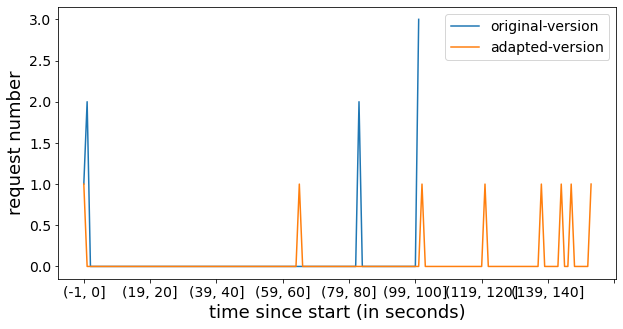

In [20]:

SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 18
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plot_occurrence = df.plot(kind='line',logy=False, figsize=(10,5))
plot_occurrence.set_xlabel("time since start (in seconds)")
plot_occurrence.set_ylabel("request number")
fig = plot_occurrence.get_figure()
fig.savefig("bug-analysis-request-firing.png")